# Import

In [1]:
import pandas as pd
import numpy as np
import pickle
import re

import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

import matplotlib.pyplot as plt

# Load

In [4]:
list_df = []
for i in range(1, 31):
    path = r'/home/khinevich/myproject/hatka/parser/data/data_{n}.pkl'.format(n=i)
    with open(path, mode='br', ) as file:
        d = pickle.load(file)
        d = pd.DataFrame(d).T
    list_df.append(d)
dt = pd.concat(list_df)

# Text

In [5]:
dt.text

1487954    Уникальная квартира, притягивающая своим качес...
1845143                                                     
3117509                                                     
3020512    Аренда 3-комнатной квартиры г. Минск пр. Машер...
2904556                                                     
                                 ...                        
3122459                                                     
3122411                                                     
3122405    1 - комнатная квартира в тихом центре по адрес...
3122382                                                     
2579952    Сдаётся абсолютно новая двухкомнатная квартира...
Name: text, Length: 870, dtype: object

In [6]:
dt.note

1487954                                                     
1845143    Представителям дипломатического корпуса возмож...
3117509    Сдается квартира студия в новом, элитном доме ...
3020512                                       Немига16 минут
2904556    Сдам квартиру как на длительный , так и на кор...
                                 ...                        
3122459    Квартира обустроенна в тихом месте центральног...
3122411    Аэродромная (2023)5 минутКовальская Слобода9 м...
3122405                                                     
3122382    Квартира в новом доме. Есть вся необходимая те...
2579952                   Петровщина4 минутыМихалово14 минут
Name: note, Length: 870, dtype: object

In [7]:
text_df = pd.DataFrame()

text_df['text'] = dt.text + ' ' + dt.note

In [8]:
text_df.iloc[1]['text']

' Представителям дипломатического корпуса возможна скидка. Все вопросы по телефону. Собственник. ТоргСкрыть'

In [9]:
text_df.text.iloc[0]

'Уникальная квартира, притягивающая своим качеством и удобством. Стильный ремонт выполнен с применением дорогостоящих строительных материалов именитых брендов. Данная квартира идеально подходит для людей, которые предпочитаю жить в квартире, где ремонт и каждый предмет интерьера продуманы и подобраны с особой тщательностью и трепетом. Просторная и светлая кухня, эксклюзивная бытовая техника будут радовать Вас не только своим внешним видом, но и функциональностью, которая позволит не только создавать вкуснейшие шедевры, но и хранить продукты на высшем уровне. Качественные ортопедические матрасы, обеспечивают комфортный сон и отдых. Оборудована гардеробная комната, вместительные шкафы-купе в каждой комнате. Дом 2014 года постройки, приятные соседи. Благоустроенный двор с оборудованной детской площадкой. Из окон открывается великолепный вид на водохранилище «Дрозды». Рядом спортивно-развлекательный комплекс «Минск-Арена», торгово-развлекательный центр «Арена-Сити» ,супермаркет «Prostore» 

In [10]:
def clear_text(text: str) -> str:
    text = text.lower()
    text = re.sub(pattern=r'\W', string=text, repl=' ')
    text = re.sub(pattern='\d+',repl=' NUMBER ', string=text)
    text = ' '.join([i for i in text.split(' ') if (len(i) > 3 and i not in ['', ' '])])
    return text

In [11]:
clear_text(text_df.text.iloc[0])

'уникальная квартира притягивающая своим качеством удобством стильный ремонт выполнен применением дорогостоящих строительных материалов именитых брендов данная квартира идеально подходит людей которые предпочитаю жить квартире ремонт каждый предмет интерьера продуманы подобраны особой тщательностью трепетом просторная светлая кухня эксклюзивная бытовая техника будут радовать только своим внешним видом функциональностью которая позволит только создавать вкуснейшие шедевры хранить продукты высшем уровне качественные ортопедические матрасы обеспечивают комфортный отдых оборудована гардеробная комната вместительные шкафы купе каждой комнате NUMBER года постройки приятные соседи благоустроенный двор оборудованной детской площадкой окон открывается великолепный водохранилище дрозды рядом спортивно развлекательный комплекс минск арена торгово развлекательный центр арена сити супермаркет prostore виталюр кинотеатр silverscreen велодорожки данную стоимость также включены парковочных места подзе

In [12]:
text_df['clear_text'] = text_df.text.map(clear_text)

In [13]:
text_tfidf_vectorizer = TfidfVectorizer()
text_tfidf_matrix = text_tfidf_vectorizer.fit_transform(text_df.clear_text)

terms = text_tfidf_vectorizer.get_feature_names_out()
text_tfidf_df = pd.DataFrame(data=text_tfidf_matrix.toarray(), columns=terms)
text_tfidf_df.index = text_df.index
text_tfidf_df

,additionally,after,alarm,allпоказать,also,angolo,animals,apartment,appletv,appliances,...,якуба,янаконтактное,январе,января,яндекс,янки,ярких,ясеня,ясна,ятоба
1487954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3117509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3020512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2904556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA

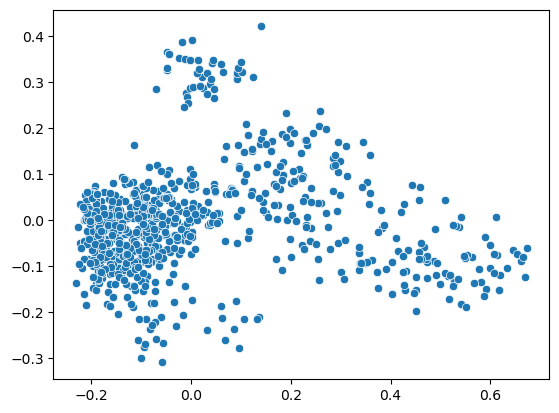

In [14]:
pca = PCA(n_components=2)
Xpca_text = pca.fit_transform(text_tfidf_df.values)

sns.scatterplot(x=Xpca_text[:, 0], y=Xpca_text[:, 1]);

## TSNE

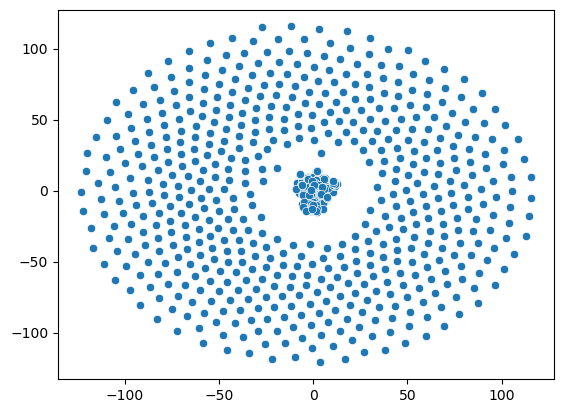

In [13]:
tsne = TSNE(n_components=2)

Xtsne_text = tsne.fit_transform(text_tfidf_df.values)

sns.scatterplot(x=Xtsne_text[:, 0], y=Xtsne_text[:, 1]);

In [14]:
text_tfidf_df

,additionally,after,alarm,allпоказать,also,angolo,animals,apartment,appletv,appliances,...,якуба,янаконтактное,январе,января,яндекс,янки,ярких,ясеня,ясна,ятоба
1487954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3117509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3020512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2904556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Поиск n_components PCA

### Сохранение объясненной дисперсии

In [15]:
pca = PCA()
pca.fit(text_tfidf_df.values)
explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)
n_components_to_preserve = np.argmax(explained_variance_cumsum >= 0.95) + 1
print('n_components =', n_components_to_preserve)

n_components = 605


### Собственные значения

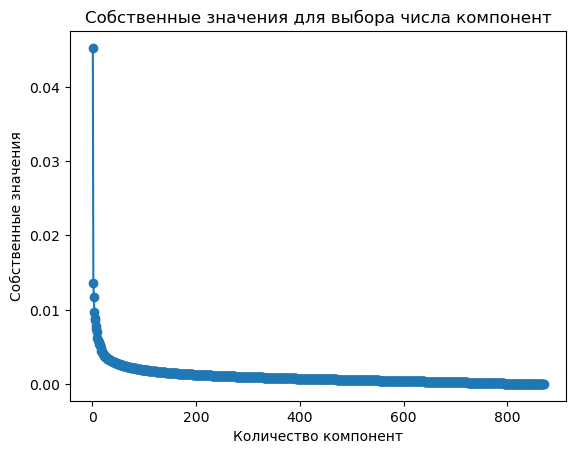

In [16]:
pca = PCA()
pca.fit(text_tfidf_df.values)
eigenvalues = pca.explained_variance_


plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Собственные значения')
plt.title('Собственные значения для выбора числа компонент')
plt.show()


### Отношение объясненной дисперсии


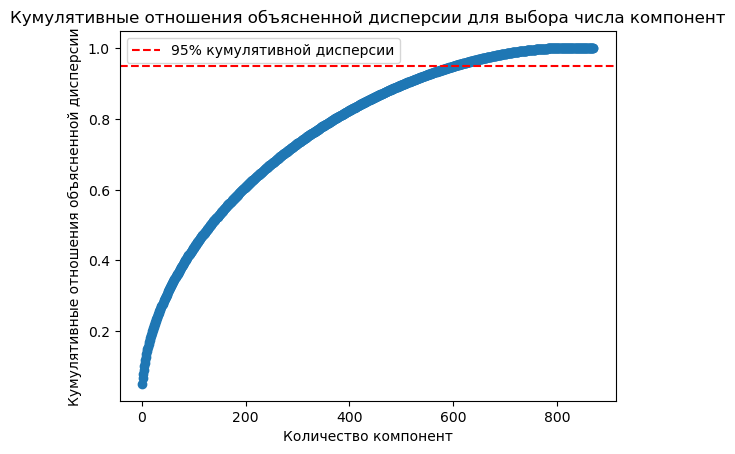

In [17]:
pca = PCA()

pca.fit(text_tfidf_df.values)

# отношения объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_

# кумулятивные отношения объясненной дисперсии
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивные отношения объясненной дисперсии')
plt.title('Кумулятивные отношения объясненной дисперсии для выбора числа компонент')

plt.axhline(y=0.95, color='r', linestyle='--', label='95% кумулятивной дисперсии')
plt.legend()
plt.show()

### Метод "Критерий Кайзера"

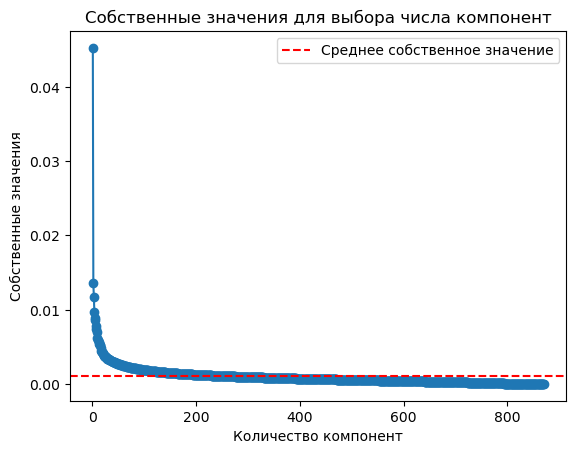

In [18]:
pca = PCA()
pca.fit(text_tfidf_df.values)

# собственные значения
eigenvalues = pca.explained_variance_

# среднее собственных значений
mean_eigenvalue = np.mean(eigenvalues)

# собственные значения
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Собственные значения')
plt.title('Собственные значения для выбора числа компонент')

# Добавляем горизонтальную линию на уровне среднего собственных значений
plt.axhline(y=mean_eigenvalue, color='r', linestyle='--', label='Среднее собственное значение')
plt.legend()
plt.show()


### Приминение PCA с выбранным числом компанент

In [24]:
pca = PCA(n_components=200)
Xpca_text = pca.fit_transform(text_tfidf_df.values)
df_pca_text = pd.DataFrame(Xpca_text, index=text_tfidf_df.index)
df_pca_text

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1487954,-0.138570,0.094882,0.244255,0.060073,-0.193138,0.134735,0.035674,0.131358,0.157000,-0.039095,...,-0.036533,-0.014660,-0.066065,-0.011493,-0.027433,0.014504,-0.046375,0.028488,0.073376,-0.042348
1845143,-0.180598,0.042056,-0.108470,-0.044839,-0.094617,0.018806,-0.020898,0.060503,0.068427,-0.008588,...,0.042116,-0.113599,-0.042939,-0.037788,0.048457,0.050077,0.031138,0.013542,-0.080894,-0.002824
3117509,-0.147424,-0.011060,0.011674,-0.056420,-0.043444,-0.054457,-0.062965,-0.036496,0.039630,-0.030397,...,0.051350,0.000039,-0.062056,-0.009469,0.001866,0.072641,0.065411,0.023705,-0.013050,0.115852
3020512,0.160462,0.149309,0.093021,-0.030740,0.012978,-0.070421,-0.023396,-0.025815,-0.065524,-0.038867,...,0.018391,-0.006240,-0.019336,0.000962,-0.001180,-0.032579,-0.019691,0.034018,-0.017607,0.041243
2904556,-0.139017,-0.000843,0.021720,0.040098,-0.037731,0.097068,-0.059356,-0.000705,0.076792,-0.060439,...,-0.019134,0.024405,-0.014337,-0.040119,0.013945,-0.038051,-0.016900,0.083571,0.023592,0.020716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,-0.187096,0.005423,-0.073819,-0.031661,-0.070395,0.008038,0.003477,0.054310,0.060398,0.001770,...,-0.019312,-0.006079,-0.023736,0.094625,-0.046893,0.037438,0.061938,-0.056352,0.087724,0.011455
3122411,0.100806,0.343477,-0.112983,0.063637,0.110780,-0.057689,0.000893,-0.073099,0.044910,0.094122,...,-0.015448,-0.000745,-0.016147,0.013017,-0.004138,0.022075,-0.029234,0.004543,-0.038907,-0.006548
3122405,-0.066923,-0.077976,0.081360,0.187804,0.169208,-0.093510,-0.053068,0.276222,-0.001796,-0.201708,...,-0.020212,-0.040474,0.027456,0.000149,-0.043070,0.013696,0.006425,-0.046082,0.016952,0.018313
3122382,-0.142488,-0.013675,0.036596,-0.147025,0.052940,0.121442,-0.043225,-0.012825,-0.025143,-0.063043,...,-0.003157,0.009157,0.000480,0.019763,-0.036771,0.046185,-0.008756,-0.025430,0.028205,-0.001043


# Title

In [25]:
dt.title

1487954    Уютная трехкомнатная квартира в современном жи...
1845143                 Два уровня комфорта в центре Минска!
3117509    Снять 1-комнатную квартиру, г. Минск, просп. Н...
3020512    Аренда 3-комнатной квартиры г. Минск пр. Машер...
2904556    Снять 2-комнатную квартиру, г. Минск, просп. Д...
                                 ...                        
3122459    Снять 2-комнатную квартиру, г. Витебск, ул. Шр...
3122411    Снять 1-комнатную квартиру, г. Минск, ул. Аэро...
3122405    Снять 1-комнатную квартиру, г. Минск, ул. Цнян...
3122382    Снять 2-комнатную квартиру, г. Минск, ул. Груш...
2579952    Сдается 2-комнатная квартира по пр-ту Дзержинс...
Name: title, Length: 870, dtype: object

In [26]:
title_df = pd.DataFrame(dt.title)
title_df

,title
1487954,Уютная трехкомнатная квартира в современном жи...
1845143,Два уровня комфорта в центре Минска!
3117509,"Снять 1-комнатную квартиру, г. Минск, просп. Н..."
3020512,Аренда 3-комнатной квартиры г. Минск пр. Машер...
2904556,"Снять 2-комнатную квартиру, г. Минск, просп. Д..."
...,...
3122459,"Снять 2-комнатную квартиру, г. Витебск, ул. Шр..."
3122411,"Снять 1-комнатную квартиру, г. Минск, ул. Аэро..."
3122405,"Снять 1-комнатную квартиру, г. Минск, ул. Цнян..."
3122382,"Снять 2-комнатную квартиру, г. Минск, ул. Груш..."


In [27]:
title_df['clear_title'] = title_df.title.map(clear_text)

In [28]:
title_tfidf_vectorizer = TfidfVectorizer()
title_tfidf_matrix = title_tfidf_vectorizer.fit_transform(title_df.clear_title)

terms = title_tfidf_vectorizer.get_feature_names_out()
title_tfidf_df = pd.DataFrame(data=title_tfidf_matrix.toarray(), columns=terms)
title_tfidf_df.index = title_df.index
title_tfidf_df

,apartment,cдам,exclusive,khoruzhey,long,minsk,number,rent,room,time,...,щорса,экологически,эксклюзивная,элитная,элитном,этаже,южный,якуба,якубова,якубовского
1487954,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845143,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3117509,0.0,0.0,0.0,0.0,0.0,0.0,0.334607,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3020512,0.0,0.0,0.0,0.0,0.0,0.0,0.208276,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2904556,0.0,0.0,0.0,0.0,0.0,0.0,0.337302,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,0.0,0.0,0.0,0.0,0.0,0.0,0.119831,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122411,0.0,0.0,0.0,0.0,0.0,0.0,0.298518,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122405,0.0,0.0,0.0,0.0,0.0,0.0,0.306832,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3122382,0.0,0.0,0.0,0.0,0.0,0.0,0.172580,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA

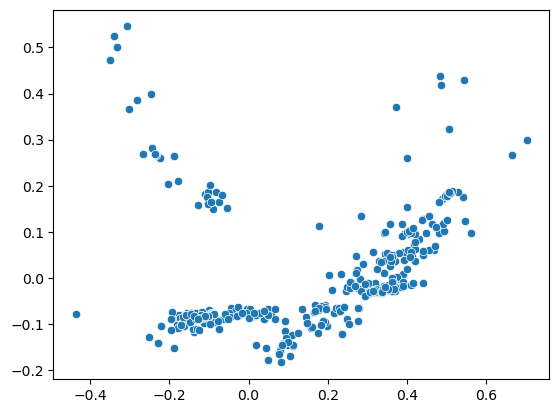

In [29]:
pca = PCA(n_components=2)
Xpca_title = pca.fit_transform(title_tfidf_df.values)

sns.scatterplot(x=Xpca_title[:, 0], y=Xpca_title[:, 1]);

### Метод "Критерий Кайзера"

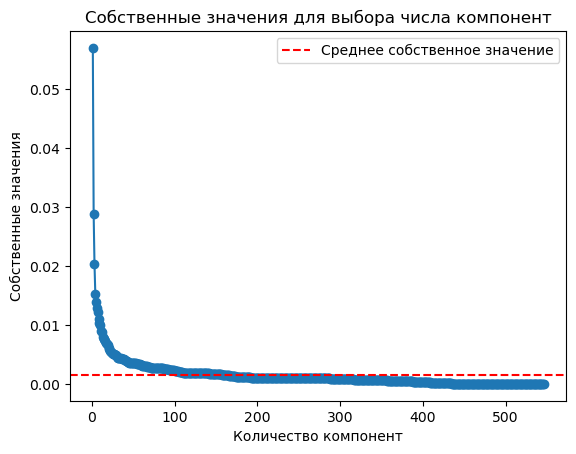

In [30]:
pca = PCA()
pca.fit(title_tfidf_df.values)

# собственные значения
eigenvalues = pca.explained_variance_

# среднее собственных значений
mean_eigenvalue = np.mean(eigenvalues)

# собственные значения
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Собственные значения')
plt.title('Собственные значения для выбора числа компонент')

# Добавляем горизонтальную линию на уровне среднего собственных значений
plt.axhline(y=mean_eigenvalue, color='r', linestyle='--', label='Среднее собственное значение')
plt.legend()
plt.show()

## PCA для title с выбранным число компанент

In [31]:
pca = PCA(n_components=100)
Xpca_title = pca.fit_transform(title_tfidf_df.values)
df_pca_title = pd.DataFrame(Xpca_title, index=title_df.index)
df_pca_title

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1487954,0.328093,-0.031360,0.191589,-0.066159,-0.005459,-0.181143,0.027146,-0.014113,0.047251,0.002378,...,0.007834,0.015094,-0.014791,0.061044,-0.064425,-0.003770,0.073185,-0.015797,0.052892,-0.011072
1845143,0.279333,-0.064317,0.257553,-0.100568,-0.008125,-0.249239,0.044465,-0.024038,0.098035,-0.005353,...,-0.042244,0.006615,0.006291,-0.008548,-0.017047,0.016127,-0.001853,-0.007122,-0.030566,-0.007453
3117509,-0.333204,0.502076,0.098859,0.002362,0.502173,-0.006621,0.033520,-0.217088,-0.001370,-0.002836,...,-0.001307,0.000939,0.000229,-0.001105,-0.002835,-0.000569,-0.000335,0.001605,-0.000367,0.000027
3020512,0.144516,-0.084203,0.323408,-0.472289,0.007063,0.538305,0.057926,0.022464,-0.117201,0.027809,...,-0.023211,0.029734,0.001642,-0.014699,-0.015027,-0.000321,0.025789,-0.010219,0.039824,0.010751
2904556,-0.340236,0.525212,0.110433,0.016064,-0.479797,0.014644,0.023864,-0.186206,0.003059,0.004955,...,-0.007271,-0.006346,0.001619,0.003052,-0.002720,-0.000739,0.000655,0.002351,-0.002402,0.001216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,0.038747,-0.071129,0.111215,-0.007495,-0.001758,-0.063705,-0.014172,0.017244,0.002800,-0.032662,...,-0.019155,0.001856,0.036002,-0.023572,-0.027806,-0.031496,-0.009660,-0.024242,0.012281,0.014125
3122411,-0.111019,-0.082516,-0.044198,-0.009590,-0.001905,-0.019015,-0.024452,-0.004875,-0.010390,-0.015765,...,-0.065931,-0.011490,0.049933,0.048249,0.000026,-0.028639,-0.051312,-0.018808,0.077082,0.008230
3122405,-0.128035,-0.088457,-0.055893,-0.005750,-0.001925,-0.011331,-0.030490,-0.004718,-0.015796,-0.021885,...,0.009135,-0.002448,-0.001278,-0.009716,-0.022968,-0.017607,0.000366,-0.006140,0.015409,0.003217
3122382,-0.124029,-0.112296,-0.036606,-0.005684,-0.007932,-0.069010,-0.046099,-0.014555,-0.032361,-0.052167,...,0.000704,0.000582,0.004930,-0.008207,-0.016254,-0.010221,-0.000671,-0.000589,0.009796,0.005302


## TSNE

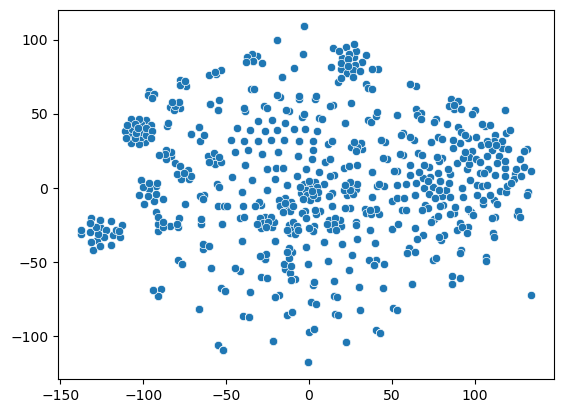

In [32]:
tsne = TSNE(n_components=2)

Xtsne_title = tsne.fit_transform(title_tfidf_df.values)

sns.scatterplot(x=Xtsne_title[:, 0], y=Xtsne_title[:, 1]);

# Merge

In [33]:
df_text_title = pd.merge(left=df_pca_text, right=df_pca_title, left_index=True, right_index=True, how='inner')
df_text_title

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y
1487954,-0.138570,0.094882,0.244255,0.060073,-0.193138,0.134735,0.035674,0.131358,0.157000,-0.039095,...,0.007834,0.015094,-0.014791,0.061044,-0.064425,-0.003770,0.073185,-0.015797,0.052892,-0.011072
1845143,-0.180598,0.042056,-0.108470,-0.044839,-0.094617,0.018806,-0.020898,0.060503,0.068427,-0.008588,...,-0.042244,0.006615,0.006291,-0.008548,-0.017047,0.016127,-0.001853,-0.007122,-0.030566,-0.007453
3117509,-0.147424,-0.011060,0.011674,-0.056420,-0.043444,-0.054457,-0.062965,-0.036496,0.039630,-0.030397,...,-0.001307,0.000939,0.000229,-0.001105,-0.002835,-0.000569,-0.000335,0.001605,-0.000367,0.000027
3020512,0.160462,0.149309,0.093021,-0.030740,0.012978,-0.070421,-0.023396,-0.025815,-0.065524,-0.038867,...,-0.023211,0.029734,0.001642,-0.014699,-0.015027,-0.000321,0.025789,-0.010219,0.039824,0.010751
2904556,-0.139017,-0.000843,0.021720,0.040098,-0.037731,0.097068,-0.059356,-0.000705,0.076792,-0.060439,...,-0.007271,-0.006346,0.001619,0.003052,-0.002720,-0.000739,0.000655,0.002351,-0.002402,0.001216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,-0.187096,0.005423,-0.073819,-0.031661,-0.070395,0.008038,0.003477,0.054310,0.060398,0.001770,...,-0.019155,0.001856,0.036002,-0.023572,-0.027806,-0.031496,-0.009660,-0.024242,0.012281,0.014125
3122411,0.100806,0.343477,-0.112983,0.063637,0.110780,-0.057689,0.000893,-0.073099,0.044910,0.094122,...,-0.065931,-0.011490,0.049933,0.048249,0.000026,-0.028639,-0.051312,-0.018808,0.077082,0.008230
3122405,-0.066923,-0.077976,0.081360,0.187804,0.169208,-0.093510,-0.053068,0.276222,-0.001796,-0.201708,...,0.009135,-0.002448,-0.001278,-0.009716,-0.022968,-0.017607,0.000366,-0.006140,0.015409,0.003217
3122382,-0.142488,-0.013675,0.036596,-0.147025,0.052940,0.121442,-0.043225,-0.012825,-0.025143,-0.063043,...,0.000704,0.000582,0.004930,-0.008207,-0.016254,-0.010221,-0.000671,-0.000589,0.009796,0.005302


In [34]:
test = df_text_title[:10]
train = df_text_title.drop(index=test.index)
test.index

Index(['1487954', '1845143', '3117509', '3020512', '2904556', '1858143',
       '3124387', '3018406', '3127167', '3102369'],
      dtype='object')

In [48]:
x = test.loc['3117509']
X = train.values

# NearestNeighbors

In [55]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=1, metric='cosine')
nn = nn.fit(X)

distance, indices = nn.kneighbors([x])
print("distance:", distance)
print("indices:", indices)

print("Расстояние:", distance[0])

distance: [[0.32136697]]
indices: [[225]]
Расстояние: [0.32136697]


In [53]:
(X[indices[0]] == train.iloc[225].values).all()

train.iloc[225]

0_x     0.046450
1_x     0.264922
2_x    -0.076814
3_x     0.010976
4_x     0.048616
          ...   
95_y   -0.000569
96_y   -0.000335
97_y    0.001605
98_y   -0.000367
99_y    0.000027
Name: 3129230, Length: 300, dtype: float64

In [54]:
# predict

dt.loc['3129230'].href

'https://realt.by/rent-flat-for-long/object/3129230/'

In [50]:
# Test

dt.loc['3117509'].href

'https://realt.by/rent-flat-for-long/object/3117509/'

In [35]:
# Найдите ближайший вектор к x

# distance - это расстояние между x и ближайшим вектором
# indices - это индекс ближайшего вектора в наборе данных X

# Выведите ближайший вектор и расстояние до него
print("Ближайший вектор:", X[indices[0]])
print("Расстояние:", distance[0])


Ближайший вектор: [[ 1.97961594e-01  1.68180381e-01  4.21276153e-01  1.00324532e-01
  -1.72458125e-01  1.27849017e-01  8.20972553e-02  8.61919270e-02
   1.09002995e-01 -4.44507886e-03  1.17752549e-01  6.74127125e-03
  -7.92817334e-03 -6.75821157e-03 -5.57134556e-03 -1.72831679e-04
  -2.20755307e-02  2.77568675e-02  2.37985071e-02 -2.29536933e-02
  -1.99626195e-02 -1.41855791e-02  2.05230027e-03 -5.96971923e-02
   4.38009498e-03  3.95245815e-03  4.22068749e-03  9.27516247e-03
  -3.19172612e-03 -3.89060709e-02 -2.12742823e-02  7.40675193e-03
   1.55062845e-02  4.89932272e-03 -2.47300320e-02  2.35443166e-02
  -6.18347220e-03 -8.22065237e-04 -3.33350910e-02  3.11043757e-02
   6.75761400e-03 -3.87173807e-02 -1.96600225e-02 -3.00775436e-02
  -2.16278998e-02  3.45097846e-02 -2.56432088e-02  1.37196908e-02
  -2.96534442e-03  5.24548230e-03  7.74036265e-03 -3.45082452e-02
   2.66703294e-02 -4.05817584e-02 -3.55626870e-02  1.84961376e-02
  -5.69304647e-03 -2.11319749e-03  2.08198607e-02 -3.10399

In [37]:
df_text_title

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y
1487954,-0.138570,0.094883,0.244254,0.060082,-0.193134,0.134741,0.035679,0.131326,0.157002,-0.039175,...,-0.105892,-0.040622,0.002853,0.037337,0.053037,0.022147,0.056021,-0.090076,-0.006275,0.026579
1845143,-0.180598,0.042058,-0.108473,-0.044827,-0.094620,0.018804,-0.020894,0.060477,0.068464,-0.008611,...,0.004483,0.027343,-0.002115,-0.002422,-0.024153,0.017262,0.009045,-0.002779,0.012667,-0.012573
3117509,-0.147424,-0.011060,0.011676,-0.056425,-0.043454,-0.054462,-0.062960,-0.036520,0.039672,-0.030406,...,-0.000735,-0.001427,-0.001190,-0.000308,-0.001732,0.000689,-0.000239,-0.000184,-0.000280,0.002260
3020512,0.160462,0.149312,0.093019,-0.030744,0.012966,-0.070409,-0.023401,-0.025813,-0.065531,-0.038786,...,0.002495,-0.065409,-0.035020,-0.012558,0.004432,-0.033343,0.000515,-0.039626,0.016751,-0.028741
2904556,-0.139017,-0.000843,0.021714,0.040094,-0.037726,0.097053,-0.059360,-0.000699,0.076792,-0.060474,...,0.000703,-0.003819,-0.002490,-0.000090,-0.001091,0.001445,0.001650,0.002436,0.001383,0.001193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,-0.187096,0.005424,-0.073820,-0.031665,-0.070395,0.008023,0.003498,0.054323,0.060387,0.001811,...,-0.005433,-0.009303,-0.037332,-0.011790,-0.031800,-0.005566,-0.002586,-0.033820,-0.012780,-0.020170
3122411,0.100806,0.343476,-0.112980,0.063640,0.110785,-0.057699,0.000878,-0.073085,0.044936,0.094163,...,-0.051058,0.027888,-0.075581,0.077931,-0.067275,0.075837,0.021042,-0.080449,-0.038179,0.029557
3122405,-0.066923,-0.077978,0.081359,0.187807,0.169217,-0.093510,-0.053075,0.276224,-0.001805,-0.201705,...,-0.003299,0.003624,-0.002070,-0.004077,-0.006154,-0.001134,0.007895,-0.007947,0.001566,0.007708
3122382,-0.142488,-0.013674,0.036595,-0.147034,0.052939,0.121440,-0.043223,-0.012817,-0.025117,-0.063032,...,0.000113,0.001111,-0.006898,-0.006567,-0.013184,-0.001688,0.003442,-0.007334,0.003385,0.002611


# PARAMS

In [335]:
map_params = []

for i in range(dt.shape[0]):
    for p in list(dt.iloc[0].params.keys()):
        map_params.append(p)
map_params = set(map_params)
map_params

{'Балкон',
 'Гараж',
 'Год постройки',
 'Квартплата',
 'Количество комнат',
 'Мебель',
 'Планировка',
 'Площадь жилая',
 'Площадь общая',
 'Раздельных комнат',
 'Ремонт',
 'Санузел',
 'Срок аренды',
 'Этажность'}

In [336]:
map_params = {'Балкон': 'balkon',
 'Гараж': 'garage',
 'Год постройки': 'bild_date',
 'Квартплата': 'salce',
 'Количество комнат': 'count_room',
 'Мебель': 'mebel',
 'Планировка': 'palerovka',
 'Площадь жилая': 'ploschad',
 'Площадь общая': 'ploschad_all',
 'Раздельных комнат': 'rooms',
 'Ремонт': 'remonts',
 'Санузел': 'sanuzel',
 'Срок аренды': 'sroc',
 'Этажность': 'etaginosti'}

In [337]:
def parser_params(params: dict, index: str) -> pd.DataFrame:
    new_params = {}
    for k in map_params.keys():
        new_k = map_params[k]
        if k in params:
            if new_k not in new_params:
                new_params[new_k] = [params[k]]
            else:
                raise Exception
        else:
            new_params[new_k] = [None]
    return pd.DataFrame(new_params, index=[index])

params_dt = pd.concat([
    parser_params(
        dt.iloc[i].params,
        dt.iloc[i].name) for i in range(dt.shape[0])
])
params_dt

,balkon,garage,bild_date,salce,count_room,mebel,palerovka,ploschad,ploschad_all,rooms,remonts,sanuzel,sroc,etaginosti
1487954,Лоджия,Есть,2014,100%,3,Есть,Новостройка,56 м²,90 м²,2,Евроремонт,Раздельный,Длительный,9
1845143,Балкон,None,1946,100%,4,Есть,Сталинка,80 м²,120 м²,3,Отличный,2 и более,Длительный,None
3117509,Лоджия,None,None,100%,1,Есть,None,34.1 м²,40.1 м²,1,Евроремонт,Совмещенный,Длительный,None
3020512,Лоджия застекленная,None,1998,Нет,3,Есть,Новостройка,56.7 м²,105.1 м²,3,None,Раздельный,Длительный,None
2904556,Лоджия застекленная,None,2017,100%,2,Есть,Новостройка,30 м²,55 м²,2,Отличный,Совмещенный,Длительный,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,Лоджия,None,1972,100%,2,Есть,Улучшенный проект,31 м²,50 м²,2,Хороший,Раздельный,Длительный,None
3122411,Лоджия,None,2017,50%,1,Есть,Новостройка,30 м²,34.9 м²,1,Евроремонт,Совмещенный,Длительный,None
3122405,Лоджия застекленная,None,1971,Нет,1,Есть,Брежневка,17 м²,35 м²,1,None,Раздельный,Длительный,None
3122382,Лоджия застекленная,None,2021,100%,2,Есть,Новостройка,42 м²,45 м²,2,Отличный,Совмещенный,Длительный,None


### balkon

In [338]:
params_dt.balkon.value_counts()

Лоджия застекленная                 192
Лоджия                              165
Балкон                              139
Балкон застекленный                  91
2 лоджии застекленные                27
2 лоджии                             21
Лоджия застекленная + вагонка        15
2 балкона застекленные               14
2 балкона                            14
Балкон застекленный + вагонка        10
2 лоджии застекленные + вагонка       4
2 балкона 1 застекленный              3
2 балкона застекленные + вагонка      3
2 лоджии 1 застекленная               1
Name: balkon, dtype: int64

In [339]:
'1234'[:-2]

'12'

In [340]:
def clear_balkon(text: str) -> str:
    text = text.lower()
    text = re.sub(pattern=r'\W', string=text, repl=' ')
    text = '_'.join([t[:-2] if len(t) > 4 else t for t in text.split(' ') if t not in ['', ' ']])
    return text

print(clear_balkon('2 лоджии 1 застекленная'))

print(clear_balkon('Балкон застекленный + вагонка'))

2_лодж_1_застекленн
балк_застекленн_вагон


In [341]:
params_dt.balkon = params_dt.balkon.map(lambda x: clear_balkon(x) if x else None)

params_dt.balkon.value_counts()

лодж_застекленн             192
лодж                        165
балк                        139
балк_застекленн              91
2_лодж_застекленн            27
2_лодж                       21
лодж_застекленн_вагон        15
2_балко_застекленн           14
2_балко                      14
балк_застекленн_вагон        10
2_лодж_застекленн_вагон       4
2_балко_1_застекленн          3
2_балко_застекленн_вагон      3
2_лодж_1_застекленн           1
Name: balkon, dtype: int64

In [342]:
balkon_df = pd.get_dummies(params_dt[['balkon']], columns=['balkon'], prefix=['balkon'])
balkon_df

,balkon_2_балко,balkon_2_балко_1_застекленн,balkon_2_балко_застекленн,balkon_2_балко_застекленн_вагон,balkon_2_лодж,balkon_2_лодж_1_застекленн,balkon_2_лодж_застекленн,balkon_2_лодж_застекленн_вагон,balkon_балк,balkon_балк_застекленн,balkon_балк_застекленн_вагон,balkon_лодж,balkon_лодж_застекленн,balkon_лодж_застекленн_вагон
1487954,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1845143,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3117509,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3020512,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2904556,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3122411,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3122405,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3122382,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### garage

In [343]:
def map_garage(x):
    if x:
        if x == 'Есть':
            return 1
        return 0
    return -1

params_dt.garage = params_dt.garage.map(map_garage)

### bild_date

In [344]:
params_dt.bild_date = params_dt.bild_date.map(lambda x: int(x) if x else -1)

### salce

In [345]:
params_dt.salce.value_counts()

100%    466
Нет     195
50%      14
Name: salce, dtype: int64

In [346]:
def map_salce(x):
    if x:
        x = re.sub(pattern=r'\W', repl='', string=x)
        if x.isdigit():
            return float(x) / 100
        return 0
    return -1

In [347]:
params_dt.salce = params_dt.salce.map(map_salce)
params_dt.salce.value_counts()

 1.0    466
 0.0    195
-1.0    195
 0.5     14
Name: salce, dtype: int64

### count_room

In [348]:
params_dt.count_room.value_counts()

2    357
1    237
3    226
4     39
5     10
6      1
Name: count_room, dtype: int64

In [349]:
params_dt.count_room = params_dt.count_room.map(lambda x: float(x) if x else -1)

### mebel

In [350]:
params_dt.mebel.value_counts()

Есть    773
Name: mebel, dtype: int64

In [351]:
def map_mebel(x):
    if x:
        if x == 'Есть':
            return 1
        return 0
    return -1

In [352]:
params_dt.mebel = params_dt.mebel.map(map_mebel)

In [353]:
params_dt.mebel.value_counts()

 1    773
-1     97
Name: mebel, dtype: int64

### palerovka

In [354]:
params_dt.palerovka.value_counts()

Новостройка           254
Улучшенный проект     181
Стандартный проект    131
Сталинка               56
Хрущевка               47
Чешский проект         40
Брежневка              23
Малосемейка             4
Таунхаус                1
Name: palerovka, dtype: int64

In [355]:
params_dt.palerovka = params_dt.palerovka.map(lambda x: x.lower() if x else -1)

palerovka_df = pd.get_dummies(params_dt[['palerovka']], columns=['palerovka'], prefix='palerovka')
palerovka_df

,palerovka_-1,palerovka_брежневка,palerovka_малосемейка,palerovka_новостройка,palerovka_сталинка,palerovka_стандартный проект,palerovka_таунхаус,palerovka_улучшенный проект,palerovka_хрущевка,palerovka_чешский проект
1487954,0,0,0,1,0,0,0,0,0,0
1845143,0,0,0,0,1,0,0,0,0,0
3117509,1,0,0,0,0,0,0,0,0,0
3020512,0,0,0,1,0,0,0,0,0,0
2904556,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3122459,0,0,0,0,0,0,0,1,0,0
3122411,0,0,0,1,0,0,0,0,0,0
3122405,0,1,0,0,0,0,0,0,0,0
3122382,0,0,0,1,0,0,0,0,0,0


### ploschad

In [356]:
params_dt.ploschad.value_counts()

18 м²       37
30 м²       36
17 м²       31
40 м²       25
35 м²       22
            ..
125.8 м²     1
89.2 м²      1
56.5 м²      1
66.5 м²      1
45.3 м²      1
Name: ploschad, Length: 335, dtype: int64

In [357]:
def clear_ploschad(x: str) -> float:
    x = x.lower()
    x = re.sub(pattern=r'\W', repl='', string=x)
    x = re.sub(pattern=r'[a-zа-я]', repl='', string=x)
    x = re.sub(pattern=r'²', repl='', string=x)
    return float(x)

params_dt.ploschad = params_dt.ploschad.map(lambda x: clear_ploschad(x) if x else -1)

params_dt.ploschad_all = params_dt.ploschad_all.map(lambda x: clear_ploschad(x) if x else -1)

### rooms

In [358]:
params_dt.rooms.value_counts()

2    359
1    284
3    182
4     35
5      5
6      1
Name: rooms, dtype: int64

In [359]:
params_dt.rooms = params_dt.rooms.map(lambda x: float(x) if x else -1)

### remonts

In [360]:
params_dt.remonts.value_counts()

Евроремонт              301
Отличный                199
Хороший                 163
Нормальный               45
Удовлетворительный       14
Без отделки               2
Строительная отделка      1
Name: remonts, dtype: int64

In [361]:
params_dt.remonts = params_dt.remonts.map(lambda x: x.lower() if x else 'нет')

remonts_df = pd.get_dummies(params_dt[['remonts']], prefix='remonts', columns=['remonts'])
remonts_df

,remonts_без отделки,remonts_евроремонт,remonts_нет,remonts_нормальный,remonts_отличный,remonts_строительная отделка,remonts_удовлетворительный,remonts_хороший
1487954,0,1,0,0,0,0,0,0
1845143,0,0,0,0,1,0,0,0
3117509,0,1,0,0,0,0,0,0
3020512,0,0,1,0,0,0,0,0
2904556,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
3122459,0,0,0,0,0,0,0,1
3122411,0,1,0,0,0,0,0,0
3122405,0,0,1,0,0,0,0,0
3122382,0,0,0,0,1,0,0,0


### sanuzel

In [362]:
params_dt.sanuzel.value_counts()

Раздельный     400
Совмещенный    301
2 и более       84
3 сан.узла       3
Name: sanuzel, dtype: int64

In [363]:
params_dt.sanuzel = params_dt.sanuzel.map(
    lambda x: x.lower() if x else 'нет'
)

def parser_sanuzel(x: str):
    x = re.sub(pattern=r'\W', repl=' ', string=x)
    x = '_'.join([t for t in x.split(' ') if t not in ['', ' ']])
    return x

params_dt.sanuzel = params_dt.sanuzel.map(parser_sanuzel)
sanuzel_df = pd.get_dummies(params_dt[['sanuzel']], columns=['sanuzel'], prefix='sanuzel')

### sroc

In [364]:
params_dt.sroc.value_counts()

Длительный    855
Год             9
Полгода         3
3 Месяца        2
2 Месяца        1
Name: sroc, dtype: int64

In [365]:
params_dt.sroc = params_dt.sroc.map(
    lambda x: x.lower() if x else 'нет'
)

params_dt.sroc.value_counts()

длительный    855
год             9
полгода         3
3 месяца        2
2 месяца        1
Name: sroc, dtype: int64

In [366]:
def parser_sroc(x: str):
    x = re.sub(pattern=r'\W', repl=' ', string=x)
    x = '_'.join(list(set([t for t in x.split(' ') if t not in ['', ' ']])))
    return x

params_dt.sroc = params_dt.sroc.map(parser_sroc)
params_dt.sroc.value_counts()

длительный    855
год             9
полгода         3
месяца_3        2
месяца_2        1
Name: sroc, dtype: int64

In [367]:
sroc_df = pd.get_dummies(params_dt[['sroc']], columns=['sroc'], prefix='sroc')

In [368]:
params_dt.etaginosti.value_counts()

9     5
19    2
12    2
5     1
10    1
4     1
16    1
Name: etaginosti, dtype: int64

In [369]:
params_dt.etaginosti = params_dt.etaginosti.map(lambda x: int(x) if x else -1)

In [370]:
feature_cat = ['balkon', 'palerovka', 'remonts', 'sanuzel', 'sroc']

params_dt.drop(columns=feature_cat, inplace=True)
params_dt

,garage,bild_date,salce,count_room,mebel,ploschad,ploschad_all,rooms,etaginosti
1487954,1,2014,1.0,3.0,1,56.0,90.0,2.0,9
1845143,-1,1946,1.0,4.0,1,80.0,120.0,3.0,-1
3117509,-1,-1,1.0,1.0,1,341.0,401.0,1.0,-1
3020512,-1,1998,0.0,3.0,1,567.0,1051.0,3.0,-1
2904556,-1,2017,1.0,2.0,1,30.0,55.0,2.0,-1
...,...,...,...,...,...,...,...,...,...
3122459,-1,1972,1.0,2.0,1,31.0,50.0,2.0,-1
3122411,-1,2017,0.5,1.0,1,30.0,349.0,1.0,-1
3122405,-1,1971,0.0,1.0,1,17.0,35.0,1.0,-1
3122382,-1,2021,1.0,2.0,1,42.0,45.0,2.0,-1


In [371]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
params_dt = pd.DataFrame(scaler.fit_transform(params_dt.values), index=datasets.index)
params_dt

,0,1,2,3,4,5,6,7,8
1487954,1.0,0.995553,1.00,0.4,1.0,0.008802,0.009697,0.428571,0.5
1845143,0.0,0.961957,1.00,0.6,1.0,0.012508,0.012894,0.571429,0.0
3117509,0.0,0.000000,1.00,0.0,1.0,0.052810,0.042839,0.285714,0.0
3020512,0.0,0.987648,0.50,0.4,1.0,0.087708,0.112106,0.571429,0.0
2904556,0.0,0.997036,1.00,0.2,1.0,0.004787,0.005968,0.428571,0.0
...,...,...,...,...,...,...,...,...,...
3122459,0.0,0.974802,1.00,0.2,1.0,0.004941,0.005435,0.428571,0.0
3122411,0.0,0.997036,0.75,0.0,1.0,0.004787,0.037298,0.285714,0.0
3122405,0.0,0.974308,0.50,0.0,1.0,0.002779,0.003836,0.285714,0.0
3122382,0.0,0.999012,1.00,0.2,1.0,0.006640,0.004902,0.428571,0.0


## JOIN

In [372]:
dfs = [balkon_df, palerovka_df, remonts_df, sanuzel_df, sroc_df]
dfs = pd.concat(dfs, axis=1)
dfs

,balkon_2_балко,balkon_2_балко_1_застекленн,balkon_2_балко_застекленн,balkon_2_балко_застекленн_вагон,balkon_2_лодж,balkon_2_лодж_1_застекленн,balkon_2_лодж_застекленн,balkon_2_лодж_застекленн_вагон,balkon_балк,balkon_балк_застекленн,...,sanuzel_2_и_более,sanuzel_3_сан_узла,sanuzel_нет,sanuzel_раздельный,sanuzel_совмещенный,sroc_год,sroc_длительный,sroc_месяца_2,sroc_месяца_3,sroc_полгода
1487954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1845143,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3117509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3020512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2904556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3122411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3122405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3122382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [373]:
params_dt = pd.merge(
    left=dfs, right=params_dt, left_index=True, right_index=True, how='inner'
)

In [374]:
params_dt

,balkon_2_балко,balkon_2_балко_1_застекленн,balkon_2_балко_застекленн,balkon_2_балко_застекленн_вагон,balkon_2_лодж,balkon_2_лодж_1_застекленн,balkon_2_лодж_застекленн,balkon_2_лодж_застекленн_вагон,balkon_балк,balkon_балк_застекленн,...,sroc_полгода,0,1,2,3,4,5,6,7,8
1487954,0,0,0,0,0,0,0,0,0,0,...,0,1.0,0.995553,1.00,0.4,1.0,0.008802,0.009697,0.428571,0.5
1845143,0,0,0,0,0,0,0,0,1,0,...,0,0.0,0.961957,1.00,0.6,1.0,0.012508,0.012894,0.571429,0.0
3117509,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.000000,1.00,0.0,1.0,0.052810,0.042839,0.285714,0.0
3020512,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.987648,0.50,0.4,1.0,0.087708,0.112106,0.571429,0.0
2904556,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.997036,1.00,0.2,1.0,0.004787,0.005968,0.428571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.974802,1.00,0.2,1.0,0.004941,0.005435,0.428571,0.0
3122411,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.997036,0.75,0.0,1.0,0.004787,0.037298,0.285714,0.0
3122405,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.974308,0.50,0.0,1.0,0.002779,0.003836,0.285714,0.0
3122382,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.999012,1.00,0.2,1.0,0.006640,0.004902,0.428571,0.0


In [375]:
df_text_title

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y
1487954,-0.138570,0.094883,0.244254,0.060082,-0.193134,0.134741,0.035679,0.131326,0.157002,-0.039175,...,-0.105892,-0.040622,0.002853,0.037337,0.053037,0.022147,0.056021,-0.090076,-0.006275,0.026579
1845143,-0.180598,0.042058,-0.108473,-0.044827,-0.094620,0.018804,-0.020894,0.060477,0.068464,-0.008611,...,0.004483,0.027343,-0.002115,-0.002422,-0.024153,0.017262,0.009045,-0.002779,0.012667,-0.012573
3117509,-0.147424,-0.011060,0.011676,-0.056425,-0.043454,-0.054462,-0.062960,-0.036520,0.039672,-0.030406,...,-0.000735,-0.001427,-0.001190,-0.000308,-0.001732,0.000689,-0.000239,-0.000184,-0.000280,0.002260
3020512,0.160462,0.149312,0.093019,-0.030744,0.012966,-0.070409,-0.023401,-0.025813,-0.065531,-0.038786,...,0.002495,-0.065409,-0.035020,-0.012558,0.004432,-0.033343,0.000515,-0.039626,0.016751,-0.028741
2904556,-0.139017,-0.000843,0.021714,0.040094,-0.037726,0.097053,-0.059360,-0.000699,0.076792,-0.060474,...,0.000703,-0.003819,-0.002490,-0.000090,-0.001091,0.001445,0.001650,0.002436,0.001383,0.001193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,-0.187096,0.005424,-0.073820,-0.031665,-0.070395,0.008023,0.003498,0.054323,0.060387,0.001811,...,-0.005433,-0.009303,-0.037332,-0.011790,-0.031800,-0.005566,-0.002586,-0.033820,-0.012780,-0.020170
3122411,0.100806,0.343476,-0.112980,0.063640,0.110785,-0.057699,0.000878,-0.073085,0.044936,0.094163,...,-0.051058,0.027888,-0.075581,0.077931,-0.067275,0.075837,0.021042,-0.080449,-0.038179,0.029557
3122405,-0.066923,-0.077978,0.081359,0.187807,0.169217,-0.093510,-0.053075,0.276224,-0.001805,-0.201705,...,-0.003299,0.003624,-0.002070,-0.004077,-0.006154,-0.001134,0.007895,-0.007947,0.001566,0.007708
3122382,-0.142488,-0.013674,0.036595,-0.147034,0.052939,0.121440,-0.043223,-0.012817,-0.025117,-0.063032,...,0.000113,0.001111,-0.006898,-0.006567,-0.013184,-0.001688,0.003442,-0.007334,0.003385,0.002611


In [376]:
datasets = pd.merge(
    left=df_text_title, right=params_dt, left_index=True, right_index=True, how='inner'
)

In [452]:
datasets

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,sroc_полгода,0,1,2,3,4,5,6,7,8
1487954,-0.138570,0.094883,0.244254,0.060082,-0.193134,0.134741,0.035679,0.131326,0.157002,-0.039175,...,0,1.0,0.995553,1.00,0.4,1.0,0.008802,0.009697,0.428571,0.5
1845143,-0.180598,0.042058,-0.108473,-0.044827,-0.094620,0.018804,-0.020894,0.060477,0.068464,-0.008611,...,0,0.0,0.961957,1.00,0.6,1.0,0.012508,0.012894,0.571429,0.0
3117509,-0.147424,-0.011060,0.011676,-0.056425,-0.043454,-0.054462,-0.062960,-0.036520,0.039672,-0.030406,...,0,0.0,0.000000,1.00,0.0,1.0,0.052810,0.042839,0.285714,0.0
3020512,0.160462,0.149312,0.093019,-0.030744,0.012966,-0.070409,-0.023401,-0.025813,-0.065531,-0.038786,...,0,0.0,0.987648,0.50,0.4,1.0,0.087708,0.112106,0.571429,0.0
2904556,-0.139017,-0.000843,0.021714,0.040094,-0.037726,0.097053,-0.059360,-0.000699,0.076792,-0.060474,...,0,0.0,0.997036,1.00,0.2,1.0,0.004787,0.005968,0.428571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122459,-0.187096,0.005424,-0.073820,-0.031665,-0.070395,0.008023,0.003498,0.054323,0.060387,0.001811,...,0,0.0,0.974802,1.00,0.2,1.0,0.004941,0.005435,0.428571,0.0
3122411,0.100806,0.343476,-0.112980,0.063640,0.110785,-0.057699,0.000878,-0.073085,0.044936,0.094163,...,0,0.0,0.997036,0.75,0.0,1.0,0.004787,0.037298,0.285714,0.0
3122405,-0.066923,-0.077978,0.081359,0.187807,0.169217,-0.093510,-0.053075,0.276224,-0.001805,-0.201705,...,0,0.0,0.974308,0.50,0.0,1.0,0.002779,0.003836,0.285714,0.0
3122382,-0.142488,-0.013674,0.036595,-0.147034,0.052939,0.121440,-0.043223,-0.012817,-0.025117,-0.063032,...,0,0.0,0.999012,1.00,0.2,1.0,0.006640,0.004902,0.428571,0.0


# NearestNeighbors 2

In [453]:
test = datasets[2:5]
train = datasets.drop(index=test.index)
test.index

Index(['3117509', '3020512', '2904556'], dtype='object')

In [456]:
x = test.loc[test.index[0]]
X = train.values

In [457]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=len(X), metric='cosine')
nn = nn.fit(X)

distance, indices = nn.kneighbors([x])
sorted_indices = indices[0]

In [460]:
train = train.iloc[sorted_indices]

In [461]:
train

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,sroc_полгода,0,1,2,3,4,5,6,7,8
3128414,-0.188599,0.057804,-0.085710,-0.026403,-0.069673,0.010122,-0.005224,0.044375,0.053297,-0.022197,...,0,0.0,0.975296,1.0,0.2,1.0,0.004478,0.004902,0.428571,0.0
1496431,-0.164487,0.047026,-0.001959,-0.085097,-0.013620,-0.060036,-0.068991,0.006400,-0.003101,-0.102683,...,0,0.0,0.991107,0.0,0.4,1.0,0.009419,0.008312,0.571429,0.0
3126969,-0.174358,0.060738,-0.079752,-0.012700,-0.064291,0.041942,0.007382,0.066083,0.055080,-0.050436,...,0,0.0,0.986660,1.0,0.2,1.0,0.004324,0.005115,0.428571,0.0
2198362,0.295357,0.104704,0.112579,0.058804,0.067530,0.052953,0.012142,-0.118170,-0.160390,0.032048,...,0,0.0,0.986660,1.0,0.0,1.0,0.026714,0.035592,0.285714,0.0
3113348,0.123193,0.150409,0.558382,0.083359,-0.158032,0.267430,0.017395,0.017065,0.111626,-0.066371,...,0,1.0,0.995059,0.5,0.4,1.0,0.007566,0.008525,0.571429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128121,-0.069499,0.019682,0.096880,-0.027559,0.060298,-0.030207,-0.066210,-0.063278,-0.032906,-0.130000,...,0,0.0,0.978755,1.0,0.2,1.0,0.004941,0.005435,0.428571,0.0
3125543,-0.190586,-0.094889,-0.175100,0.230427,-0.063826,0.035193,-0.027027,-0.023835,0.046240,-0.007064,...,0,0.0,0.999506,1.0,0.0,1.0,0.002779,0.004689,0.285714,0.0
3126310,0.283870,0.134423,0.070669,0.056475,0.074368,-0.033744,0.029978,-0.063515,-0.103458,-0.046822,...,0,0.0,0.969862,0.5,0.2,1.0,0.044317,0.042519,0.285714,0.0
3127402,-0.214440,-0.159997,-0.119360,0.185910,-0.041550,0.225550,0.089880,-0.152373,-0.079863,0.065559,...,0,0.0,0.972332,0.5,0.2,0.0,0.004478,0.005222,0.428571,0.0


In [459]:
(datasets.loc['3127698'].values == train.loc['3127698'].values).all()

True

In [395]:
index = train.iloc[[846]].index

In [396]:
dt.loc[index].href.values

array(['https://realt.by/rent-flat-for-long/object/3121452/'],
      dtype=object)

In [462]:
dt.loc['3128414'].href

'https://realt.by/rent-flat-for-long/object/3128414/'

In [463]:
dt.loc['3117509'].href

'https://realt.by/rent-flat-for-long/object/3117509/'

In [465]:
nn = NearestNeighbors(n_neighbors=1, metric='cosine')
nn = nn.fit(X)

distance, nearest_neighbor_index = nn.kneighbors([x])
print(distance)
print(nearest_neighbor_index)

[[0.12732823]]
[[289]]


In [451]:
cosine_similarity = np.dot(x.values, X[713]) / (np.linalg.norm(x.values) * np.linalg.norm(X[713]))

print(cosine_similarity)

0.8431501600783486


In [469]:
dt.loc[train.iloc[nearest_neighbor_index[0]].index[0]].href

'https://realt.by/rent-flat-for-long/object/1858143/'

In [472]:
dt.loc[x.name].href

'https://realt.by/rent-flat-for-long/object/3117509/'